In [2]:
import pandas as pd
import pickle
with open('data_final.txt', 'rb') as f:
    df = pickle.load(f)
df = pd.DataFrame(df)
df

,target,product,clean_product
0,0,[대구백화점]2)슈퍼콤마비 Typo print cotton t W6TCM18103BLK,대구 백화점 슈퍼 콤 마비 Typo print cotton t W TCM BLK
1,0,[추가3%캐시백][AK플라자]보브 [VOV]가오리 절개 티셔츠 7115340804,추가 캐시 AK 플라자 보브 VOV 가오리 절개 티셔츠
2,0,[오가게/페퍼]베이직 스판 이중나시 103588,페퍼 베이직 스판 이중 나시
3,0,낫띵 프린팅 박스티셔츠 DM-6659,낫띵 프린팅 박스 티셔츠 DM
4,0,[해외]다니엘라 그레지 코튼 스웨터 MB6X5C13112F,해외 다니엘 그레 코튼 스웨터 MB X C F
...,...,...,...
8134813,4214,국산 저주파자극기패드 저주파패드 의료용전극 2조4장,국산 파자 극기 패드 주파 패드 의료 용 전극 장
8134814,4214,VT 국산 저주파패드 2조4장 핀타입,VT 국산 주파 패드 장 핀 타입
8134815,4214,(무료배송)[미국액셀가드정품]엑셀가드 저주파 자극기 패드 10조 20장 핀타입 (고급형),무료 배송 미국 액셀 가드 정품 엑셀 가드 주파 자극 기 패드 장 핀 타입 고급
8134816,4214,MD파워추천 영원저주파 YW7000용 저주파 젤 패드 5조(10장) YW-7000교...,MD 파워 추천 주파 YW 용 주파 젤 패드 장 YW 교체 필 패드 젤 패드


In [5]:
train = df['clean_product'] # X_data 역할

In [6]:
target = df['target'].values # y_data 역할
target

array([   0,    0,    0, ..., 4214, 4214, 4214])

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 150000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train)
train = tokenizer.texts_to_sequences(train)

In [8]:
train

[[488, 11, 264, 2440, 8610, 21257, 1402, 906, 33, 25, 20949, 1272],
 [101, 740, 85, 329, 2830, 5760, 6544, 1720, 39],
 [9917, 242, 736, 956, 1548],
 [48220, 1786, 36, 39, 1236],
 [1, 4032, 18863, 650, 1299, 1654, 4, 23, 31],
 [548, 19835, 1202, 166, 39, 40, 610, 2431, 136, 466, 155, 2490, 908],
 [623, 1359, 242, 39, 59792, 292, 39, 350, 127, 648, 556],
 [19, 13, 8, 33, 353, 1304, 235, 39],
 [238, 1697],
 [134519, 161, 492, 39, 1676, 3, 610, 995],
 [5104, 6146, 151, 39, 112371],
 [404, 30420, 1033, 64, 1824, 3951, 1908, 5927, 685],
 [20, 11, 20, 11, 80, 6, 1505, 830, 580, 112372, 269, 39],
 [67, 67, 731, 488, 11, 107, 1548, 1958, 749],
 [135, 1861, 5764, 28, 2445],
 [3194, 920, 142, 39, 1958, 13917],
 [89, 544, 27, 15, 362, 1477],
 [20, 11, 2767, 2507, 18, 269, 3326, 78, 33944, 2705, 5],
 [38, 11, 5182, 1050, 11811, 39, 5],
 [33, 359, 481, 2452, 2437, 64],
 [1, 1761, 1973, 17001, 3013, 1701],
 [3194, 731, 3194, 731, 731, 3194, 3326, 97, 39, 4076, 30703],
 [155, 11, 3890, 845, 548, 20885

In [9]:
df['clean_product'].values

array(['대구 백화점 슈퍼 콤 마비 Typo print cotton t W TCM BLK',
       '추가 캐시 AK 플라자 보브 VOV 가오리 절개 티셔츠', '페퍼 베이직 스판 이중 나시', ...,
       '무료 배송 미국 액셀 가드 정품 엑셀 가드 주파 자극 기 패드 장 핀 타입 고급',
       'MD 파워 추천 주파 YW 용 주파 젤 패드 장 YW 교체 필 패드 젤 패드',
       '주파 패드 대성 패드 장 파자 극기'], dtype=object)

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 25
data = pad_sequences(train, maxlen = max_len)
print(data.shape)

(8134818, 25)


In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

seed = 2020
X_train, X_val, Y_train, Y_val = train_test_split(data, target, test_size=0.2, random_state = seed)

In [12]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [13]:
model = Sequential()
model.add(Embedding(max_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(4215, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, Y_train, epochs=4, batch_size=5000, validation_split =0.2)

Epoch 1/4
1042/1042 [==============================] - 374s 359ms/step - loss: 6.6837 - acc: 0.0185 - val_loss: 5.7529 - val_acc: 0.0488
Epoch 2/4
1042/1042 [==============================] - 366s 351ms/step - loss: 4.7739 - acc: 0.1517 - val_loss: 3.9842 - val_acc: 0.2541
Epoch 3/4
1042/1042 [==============================] - 361s 347ms/step - loss: 3.4608 - acc: 0.3296 - val_loss: 3.1024 - val_acc: 0.3873
Epoch 4/4
1042/1042 [==============================] - 363s 348ms/step - loss: 2.8172 - acc: 0.4312 - val_loss: 2.6823 - val_acc: 0.4552


In [15]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_val, Y_val)[1]))

50843/50843 [==============================] - 119s 2ms/step - loss: 2.6853 - acc: 0.4552

 테스트 정확도: 0.4552


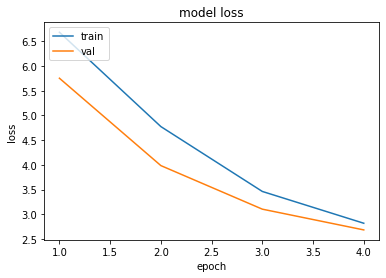

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()